# Pre processamento de dados python
<h4> Neste notebook vou inserir algumas técnicas de pre processamento, normalização, organização dos dados <h4>
    
Bibliotecas

In [60]:
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer ## Dados faltantes

from sklearn.preprocessing import LabelEncoder, OneHotEncoder ## Dados categóricos

from sklearn.model_selection import train_test_split ## Divisao de dados

from sklearn.preprocessing import StandardScaler, MinMaxScaler ## scaling de features

from matplotlib import pyplot as plt
import seaborn as sns



Bases de dados para os experimentos 
 - Minha base de dados PJM+UK (Demanda de Energia + Temperatura do ar) 
 - Base de dados experimental

In [100]:
datasetPJMEric = pd.read_csv("/home/eric/Documents/Datasets/RTO_Dados12_2014_2016.csv", sep=",",header=None)
datasetIris = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")
datasetDiamonds = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv")
#Melhor ferramenta para uma analise rapida, encarar os dados
datasetDiamonds.describe() # Quartils, desvio, média, contagem, max e min
#dataset.head() # Visualiza o inicio da dataframe
#dataset.shape() # Visualiza o tamanho do dataframe

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [75]:
datasetDiamonds[datasetDiamonds.isnull().any(axis=1)]

,carat,cut,color,clarity,depth,table,price,x,y,z


In [26]:
#Checar os valores nulos
#dataset.isnull()
nans = lambda df: df[df.isnull().any(axis=1)] # Criando um lambda p/ detecção em todas as colunas de calores nulos
#nans(dataset)
#Nunca esquecer que as vezes o notepad++, excel libreoffice pode fornecer a ajuda que precisa
#Neste caso tratando de uma série temporal o valor faltante se propaga nas linhas subsequentes
#Por exemplo se a ultima coluna for nula na proxima linha a penultima sera nula e a proxima e assim por diante

### Tratando do formato dos dados de entrada o atributo faltante se propaga por toda a série temporal
Existem alguns métodos para este fim.
 - Remoção
 - Inserção
e o uso de algoritmos que suportam valores faltantes

In [101]:
datasetRemocao = datasetPJMEric
datasetRemocao = datasetRemocao.dropna()
nans(datasetRemocao) #Todas as rows com NaN removidas

,0,1,2,3,4,5,6,7,8,9,10,11


<h2>Para realizar input é importante navegar pelo DataFrame
 Single selections using iloc and DataFrame <h2> 
    
   # Segue alguns exemplos 

### Rows:
data.iloc[0] # first row of data frame (Aleshia Tomkiewicz) - Note a Series data type output. <br>
data.iloc[1] # second row of data frame (Evan Zigomalas) <br>
data.iloc[-1] # last row of data frame (Mi Richan) <br>
### Columns:
data.iloc[:,0] # first column of data frame (first_name) <br>
data.iloc[:,1] # second column of data frame (last_name) <br>
data.iloc[:,-1] # last column of data frame (id) <br>

### Multiple row and column selections using iloc and DataFrame
data.iloc[0:5] # first five rows of dataframe <br>
data.iloc[:, 0:2] # first two columns of data frame with all rows <br>
data.iloc[[0,3,6,24], [0,5,6]] # 1st, 4th, 7th, 25th row + 1st 6th 7th columns. <br>
data.iloc[0:5, 5:8] # first 5 rows and 5th, 6th, 7th columns of data frame (county -> phone1).

In [32]:
dataset.iloc[7286:7297] #Argumento do que vai colocar no lugar

,0,1,2,3,4,5,6,7,8,9,10,11
7286,83656.773,82932.732,82899.974,83953.736,87193.190,88914.932,87579.416,85528.464,82192.567,78146.130,73847.095,NaN
7287,82932.732,82899.974,83953.736,87193.190,88914.932,87579.416,85528.464,82192.567,78146.130,73847.095,NaN,70444.804
7288,82899.974,83953.736,87193.190,88914.932,87579.416,85528.464,82192.567,78146.130,73847.095,NaN,70444.804,70443.556
7289,83953.736,87193.190,88914.932,87579.416,85528.464,82192.567,78146.130,73847.095,NaN,70444.804,70443.556,71667.553
7290,87193.190,88914.932,87579.416,85528.464,82192.567,78146.130,73847.095,NaN,70444.804,70443.556,71667.553,73305.769
7291,88914.932,87579.416,85528.464,82192.567,78146.130,73847.095,NaN,70444.804,70443.556,71667.553,73305.769,76267.412
7292,87579.416,85528.464,82192.567,78146.130,73847.095,NaN,70444.804,70443.556,71667.553,73305.769,76267.412,79196.719
7293,85528.464,82192.567,78146.130,73847.095,NaN,70444.804,70443.556,71667.553,73305.769,76267.412,79196.719,82000.525
7294,82192.567,78146.130,73847.095,NaN,70444.804,70443.556,71667.553,73305.769,76267.412,79196.719,82000.525,83611.877
7295,78146.130,73847.095,NaN,70444.804,70443.556,71667.553,73305.769,76267.412,79196.719,82000.525,83611.877,82696.197


In [65]:
#Não é do interesse remover as rows com NaN 
datasetInserir = datasetPJMEric
datasetInserir = datasetInserir.fillna(method="ffill") #Argumento do que vai colocar no lugar bfill e ffill back and foward fill
datasetInserir.iloc[7286:7297]

#Ou pode-se fazer uso do Inputer do sklearn
datasetImputer = datasetPJMEric
imputer = SimpleImputer(missing_values=np.nan, strategy='mean') #median mean most frequent são algumas estratégias
datasetImputer = pd.DataFrame(imputer.fit_transform(datasetImputer))


## Feito o tratamento de dados este deverá ser dividido, normalizado etc.

In [107]:
#Normalizando os dados com standard Scaler 
datasetPJMEric = datasetInserir # usando o datasetInserir pois tem o tratamento que prefiro para séries temporais

scalerMinMax   = MinMaxScaler(feature_range=(0, 1))
scalerStandard = StandardScaler()


uni_train_mean = datasetPJMEric.mean()
uni_train_std  = datasetPJMEric.std()

print('Media = '+ str(uni_train_mean)) # o ideal é colocar a limitação de linhas
print('Desvio = '+str(uni_train_std))

#Escala em funcao da media e desvio padrao (Standard Scaler do sklearn)
#datasetPJMEric = (dataset-uni_train_mean)/uni_train_std 

#datasetInserir = scalerStandard.fit_transform(datasetInserir)
#Ambos datasetPJMEric e datasetInserir terão os mesmos valores apenas em formatos diferentes

#Escala 0 até 1
#dataset = np.array(dataset).reshape(-1,1)

#dataset = scalerMinMax.fit_transform(dataset)

#l1 e l2 norm e max
datasetPJMEric = np.linalg.norm(datasetPJMEric,1)



Media = -1.190143529386136e-16
Desvio = 1.0000000000000002


21079.017954037277

## Dados categóricos como é presente no datasetDiamonds
### Para isto existe algumas estratégias e ferramentas para este fim

In [94]:
# Uma delas é  incluir valores numéricos para as categorias que é o que o LabelEncoder faz
#Retornando valores de 0 até n baseado no numero de classes
#Primeiramente mensurar a quantidade de categorias
datasetDiamonds.clarity.value_counts() #Aqui temos visualização de quantidade por atributo podendo ser para cut, color, clarity 

labelDiamondsEncoder = LabelEncoder()

datasetDiamonds['cut'] = labelDiamondsEncoder.fit_transform(datasetDiamonds['cut'])
# datasetDiamonds o atributo CUT foi alterado para a escala numérica

In [95]:
datasetDiamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,4,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,4,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,4,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,0,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,4,H,VS1,59.4,61.0,338,4.00,4.05,2.39


## Cuidado em escalas categóricas pois o algoritmo não distingue as categorias pelas escalas. No caso do datasetDiamonds um corte Defeituoso pode receber valor 2 um corte Perfeito pode receber valor 3 e um corte muito bom pode receber valor 1, assim não correspondendo a escala real.

Minha preferência é realizar manualmente esta substituição

### Voltando as normalizações pode-se ver o efeito plotando o gráfico da correlação onde tanto dataset quanto datasetInserir quanto datasetPJMEric tem a mesma correção conforme o grafico

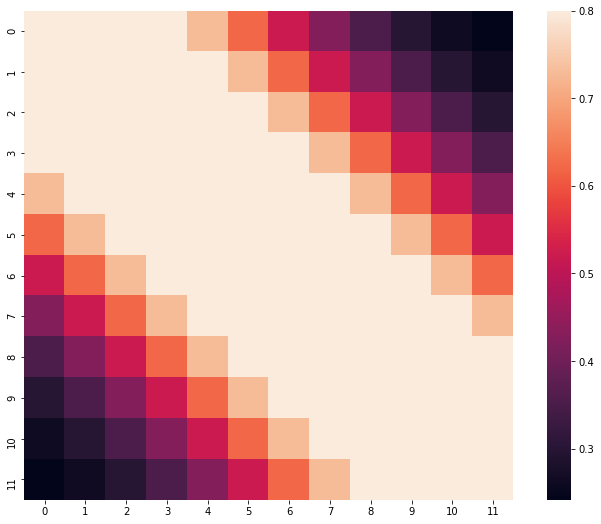

In [102]:
correlation_matrix = datasetInserir.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()

In [119]:
sns.lineplot(x="nada",y="outro",data=pd.DataFrame(datasetInserir)[11])

ValueError: Could not interpret input 'nada'